# Classification Project - Data Visualization
- Wayne Lam (Student)
- Flatiron School (Data Science Program)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb

pd.set_option('display.max_columns', 300)

In [4]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [7]:
xgb_model = pickle.load(open("xgb_model.p", "rb"))
X_train = pickle.load(open("X_train.p", "rb"))
X_test = pickle.load(open("X_test.p", "rb"))
y_train = pickle.load(open("y_train.p", "rb"))
y_test = pickle.load(open("y_test.p", "rb"))

In [10]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
def _best_feats():
    features = [ (X_train.columns[idx], round(val, 4))
                for idx, val in enumerate(xgb_model.feature_importances_)
                if val != 0 ]
    best = sorted(features, key=lambda x:x[1], reverse=True)[:10]
    return best

In [53]:
def plot_bf():
    best = pd.DataFrame(_best_feats(), columns=['Features', 'Importance'])
    f, ax = plt.subplots(figsize = (25,10))
    chart = sns.barplot(x='Features', y='Importance', data=best)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontsize='x-large')
    chart.set_xlabel(chart.get_xlabel(), fontsize=30)
    chart.set_ylabel(chart.get_ylabel(), fontsize=30)
    plt.show()

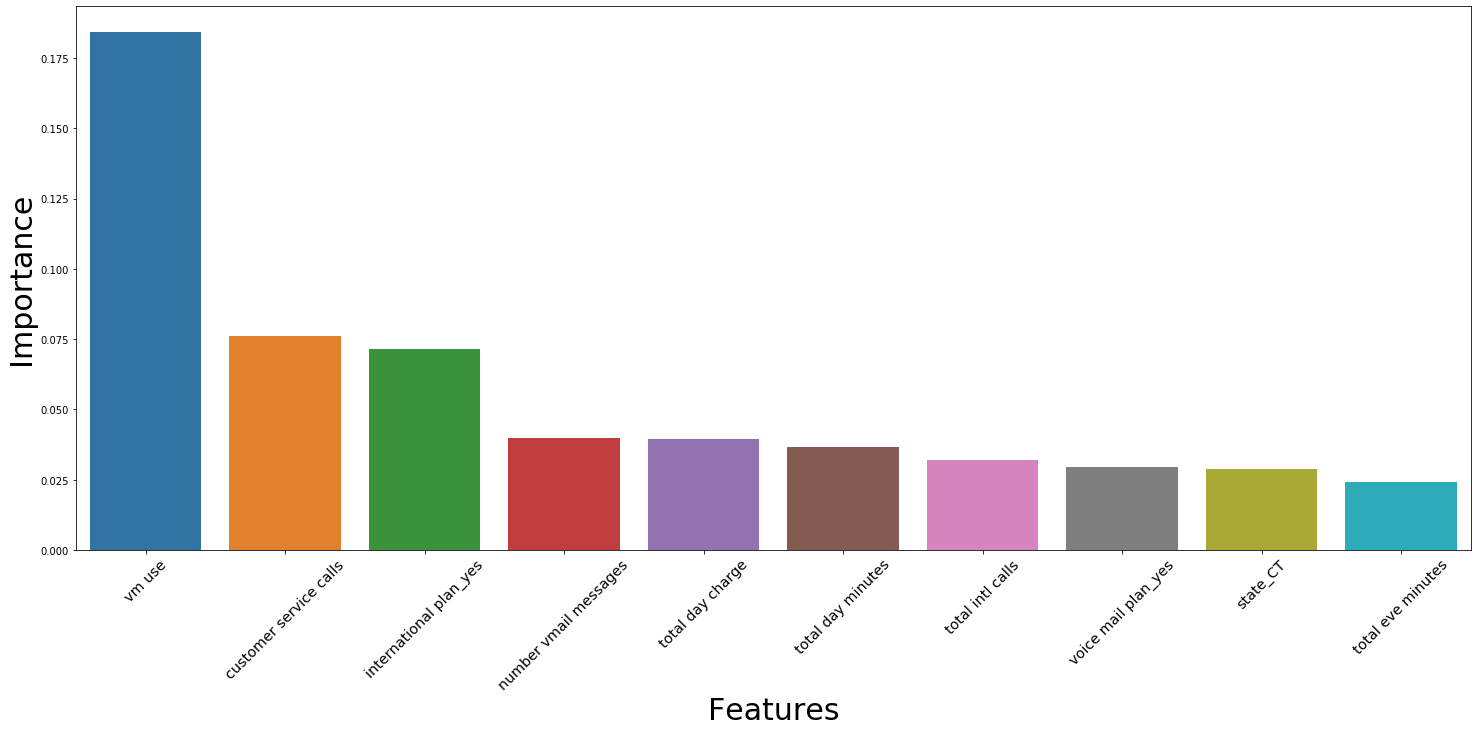

In [54]:
plot_bf()

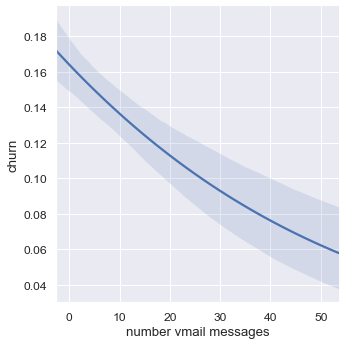

In [69]:
# f, ax = plt.subplots(figsize = (25,10))
sns.set(font_scale=1.1)
sns.lmplot(x='number vmail messages', y='churn', scatter=False, data=df, logistic=True)
plt.show()

In [94]:
df['Use VM'] = np.where(df['number vmail messages'] > 0, 'Uses VM', 'Does not use VM')

In [95]:
df['vm use'].value_counts()

Does not use VM    2411
Uses VM             922
Name: vm use, dtype: int64

In [96]:
df.groupby('vm use')['churn'].value_counts(normalize=True)

vm use           churn
Does not use VM  False    0.832849
                 True     0.167151
Uses VM          False    0.913232
                 True     0.086768
Name: churn, dtype: float64

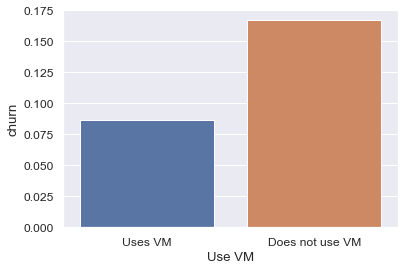

In [100]:
sns.set(font_scale=1.1)
sns.barplot(x='Use VM', y='churn', data=df, ci=None)
plt.show()

In [104]:
df.groupby('state')['churn'].value_counts()['CT']

churn
False    62
True     12
Name: churn, dtype: int64

In [105]:
12/62

0.1935483870967742